In [1]:
%config Completer.use_jedi = False

In [2]:
from rasterio.warp import transform
from rasterio.crs import CRS

In [3]:
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

Stationsstraat 205
2910 Essen
51,462935° - 4,453936°

In [6]:
DTM_tif_loc = r'C:\Users\simon\PycharmProjects\3D_houses\data\DTM\GeoTIFF\DHMVIIDTMRAS1m_k01.tif'
DTM = rio.open(DTM_tif_loc)

In [7]:
DSM_tif_loc = r'C:\Users\simon\PycharmProjects\3D_houses\data\DSM\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
DSM = rio.open(DSM_tif_loc)

In [8]:
with rio.open(DTM_tif_loc) as src:
    lidar_dtm_im = src.read()
    dTm_meta = src.profile

In [9]:
with rio.open(DSM_tif_loc) as src:
    lidar_dsm_im = src.read()
    dsm_meta = src.profile

In [10]:
lidar_dsm_im

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [11]:
lidar_dtm_im

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.693e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,
          1.688e+01,  1.690e+01]]], dtype=float32)

In [13]:
lidar_chm = lidar_dsm_im - lidar_dtm_im

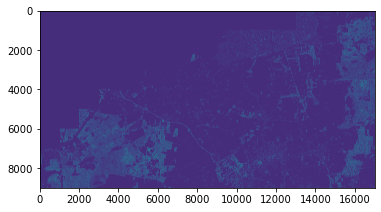

<AxesSubplot:>

In [15]:
show(lidar_chm)

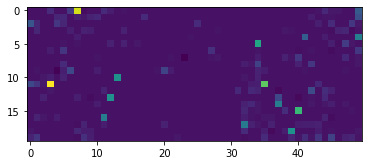

<AxesSubplot:>

In [26]:
show(lidar_chm[:, 7680:7700, 4950:5000])

In [19]:
lidar_chm[:, :, :]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.02000046],
        [0.        , 0.        , 0.        , ..., 0.01000023,
         0.        , 0.01000023]]], dtype=float32)

In [80]:
z = lidar_chm[:, -2000:, 1000:3000][0]

In [81]:
z.shape

(2000, 2000)

In [91]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook

In [92]:
x = np.arange(0, z.shape[0])
y = np.arange(0, z.shape[1])
x, y = np.meshgrid(x, y)

In [93]:
z2 = np.ma.average(z, axis=0, weights=[0.5, 1, 0.5])

ValueError: Length of weights not compatible with specified axis.

In [94]:
z2.shape

(2000,)

<IPython.core.display.Javascript object>


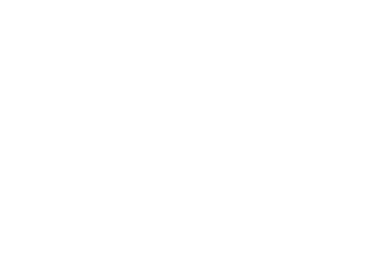

<IPython.core.display.Javascript object>


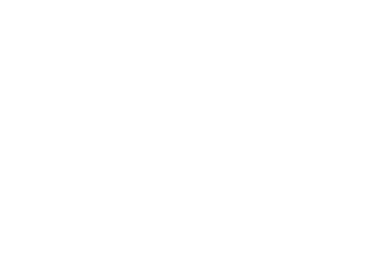

In [95]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ValueError: Argument Z must be 2-dimensional.

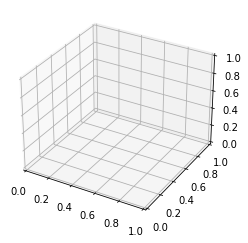

In [89]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [49]:
surf = ax.plot_surface(x, y, z[0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [33]:
surf = ax.plot_surface(lidar_chm[:, 7680:7700, 4950:5000], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

TypeError: plot_surface() missing 2 required positional arguments: 'Y' and 'Z'

In [31]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

In [32]:
X

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])

In [96]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=[1, 2, 3],  # <-- Put your data instead
    y=[4, 5, 6],  # <-- Put your data instead
    z=[7, 8, 9],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

ModuleNotFoundError: No module named 'plotly'